In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 보스턴 주택 가격 데이터 셋
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [12]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean

In [15]:
std = train_data.std(axis = 0)
train_data = train_data/std

In [17]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [18]:
mean2 = test_data.mean(axis=0)
test_data -= mean2
std2 = test_data.std(axis=0)
test_data /= std2
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [27]:
# 신경망 구축
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1)) # 회귀 모델에서는 output layer에서 활성화함수를 지정해주지 않아도 된다!

    model.compile(optimizer='rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [31]:
# K-fold 검증
k = 4
num_epochs = 500
num_val_samples = len(train_data) // k
all_scores = []

for i in range(k):
    # 검증 데이터를 준비: k번째 분할
    val_data = train_data[i * num_val_samples :(i+1) * num_val_samples]
    val_label = train_labels[i * num_val_samples :(i+1) * num_val_samples]

    # 훈련 데이터의 준비
    partial_train_data = np.concatenate([train_data[:i * num_val_samples] , train_data[(i+1) * num_val_samples:]],axis = 0)
    partial_train_label = np.concatenate([train_labels[:i * num_val_samples] , train_labels[(i+1) * num_val_samples:]],axis = 0)
    # 모델
    model = build_model()
    history = model.fit(partial_train_data,partial_train_label,epochs=num_epochs,batch_size=1,validation_data=(val_data,val_label))
    # val_mse , val_mae = model.evaluate(val_data,val_label)
    mae_history = history.history['mae']
    all_scores.append(mae_history)
print(all_scores)
    

Epoch 1/500
303/303 [==============================] - 1s 1ms/step - loss: 176.9182 - mae: 9.7282 - val_loss: 29.5131 - val_mae: 3.6521
Epoch 2/500
303/303 [==============================] - 0s 987us/step - loss: 24.7036 - mae: 3.4673 - val_loss: 18.5732 - val_mae: 2.7259
Epoch 3/500
303/303 [==============================] - 0s 901us/step - loss: 19.6081 - mae: 2.9769 - val_loss: 14.3801 - val_mae: 2.5919
Epoch 4/500
303/303 [==============================] - 0s 903us/step - loss: 16.4509 - mae: 2.7935 - val_loss: 13.4636 - val_mae: 2.3019
Epoch 5/500
303/303 [==============================] - 0s 1000us/step - loss: 16.2119 - mae: 2.5940 - val_loss: 12.8484 - val_mae: 2.4248
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 14.9960 - mae: 2.5657 - val_loss: 13.2701 - val_mae: 2.2292
Epoch 7/500
303/303 [==============================] - 0s 1000us/step - loss: 14.6075 - mae: 2.4740 - val_loss: 12.1292 - val_mae: 2.1105
Epoch 8/500
303/303 [=====================

In [37]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

In [48]:
average_mae_history

[10.333946466445923,
 3.5878414511680603,
 2.9448288083076477,
 2.7532846927642822,
 2.5529032349586487,
 2.4781656861305237,
 2.4124401211738586,
 2.329069495201111,
 2.2936368584632874,
 2.2726985812187195,
 2.223919153213501,
 2.173682928085327,
 2.1698535680770874,
 2.105458974838257,
 2.139925479888916,
 2.0638734698295593,
 2.02901291847229,
 2.0402398705482483,
 2.0165669322013855,
 1.9819476306438446,
 1.9382678866386414,
 1.9316143095493317,
 1.9196472465991974,
 1.8891960382461548,
 1.8841065764427185,
 1.8779557347297668,
 1.8651064038276672,
 1.8493234813213348,
 1.8479987382888794,
 1.8034521043300629,
 1.8174611628055573,
 1.807559311389923,
 1.7597114741802216,
 1.7531369030475616,
 1.7328361868858337,
 1.751590371131897,
 1.7170834243297577,
 1.7322052121162415,
 1.7017450332641602,
 1.7182382345199585,
 1.723647654056549,
 1.686545193195343,
 1.6705922186374664,
 1.6538625955581665,
 1.672885000705719,
 1.6416810750961304,
 1.6523229777812958,
 1.6299690306186676,
 1.6

In [47]:
[x[i] for x in all_scores for i in range(num_epochs)]

[9.72824764251709,
 3.467315673828125,
 2.976921558380127,
 2.793487071990967,
 2.5939955711364746,
 2.5657196044921875,
 2.4740447998046875,
 2.403531074523926,
 2.3856916427612305,
 2.357170581817627,
 2.2561521530151367,
 2.231301784515381,
 2.241489887237549,
 2.1953816413879395,
 2.1876063346862793,
 2.1116302013397217,
 2.064466714859009,
 2.1549670696258545,
 2.051835060119629,
 2.0758931636810303,
 1.9710789918899536,
 1.9591567516326904,
 2.022346258163452,
 1.9669004678726196,
 1.9887973070144653,
 1.9142671823501587,
 1.9108455181121826,
 1.8985800743103027,
 1.9405380487442017,
 1.9191935062408447,
 1.8788189888000488,
 1.884305715560913,
 1.834637999534607,
 1.8249229192733765,
 1.7940863370895386,
 1.7711923122406006,
 1.714968204498291,
 1.7735158205032349,
 1.7649606466293335,
 1.7875421047210693,
 1.7660516500473022,
 1.7764991521835327,
 1.6728882789611816,
 1.745168924331665,
 1.7615333795547485,
 1.6623759269714355,
 1.7395023107528687,
 1.6665682792663574,
 1.70260

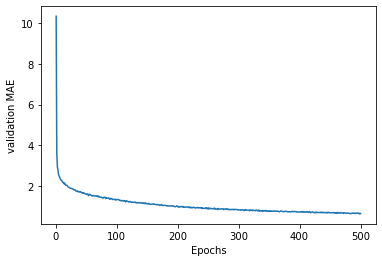

In [43]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()